In [ ]:
#Download the data from following link and import to anacondsS
#data_link:https://www.kaggle.com/datasets/mrsimple07/diabetes-prediction?select=Diabetes_prediction.csv

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

C:\Users\Dhanu\anaconda3\envs\pyth\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [16]:
Diabetes_data=pd.read_csv("Diabetes_prediction.csv")

In [3]:
Diabetes_data.shape

(1000, 9)

In [4]:
Diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0


In [6]:
Diabetes_data.mean()

Pregnancies                  1.771000
Glucose                     99.440607
BloodPressure               72.179837
SkinThickness               23.278316
Insulin                     84.582679
BMI                         25.433600
DiabetesPedigreeFunction     0.449383
Age                         43.281798
Diagnosis                    0.306000
dtype: float64

In [5]:
Diabetes_data['Diagnosis'].value_counts()

Diagnosis
0    694
1    306
Name: count, dtype: int64

In [17]:
Diag_count=Diabetes_data.groupby(['Diagnosis']).size()

In [18]:
(Diag_count/len(Diabetes_data))*100 #percentage

Diagnosis
0    69.4
1    30.6
dtype: float64

In [37]:
Diabetes_data.groupby(['Diagnosis'])['Age'].mean() #to calculate the mean for every variable based on the groups of Diagnos

Diagnosis
0    43.711192
1    42.307942
Name: Age, dtype: float64

In [35]:
Diabetes_data.groupby(['Diagnosis'])['Age'].mean()

Diagnosis
0    43.711192
1    42.307942
Name: Age, dtype: float64

In [24]:
Diabetes_data[['Glucose','Diagnosis']].groupby('Diagnosis').mean()

,Glucose
Diagnosis,
0,99.504846
1,99.294917


In [26]:
Diabetes_data[['Pregnancies','Diagnosis']].groupby(['Diagnosis','Pregnancies']).size()

Diagnosis  Pregnancies
0          0              131
           1              194
           2              186
           3              104
           4               50
           5               24
           6                4
           8                1
1          0               54
           1               91
           2               76
           3               53
           4               23
           5                7
           6                2
dtype: int64

In [32]:
Diabetes_data[['Pregnancies','Diagnosis']].groupby(['Diagnosis']).mean()

,Pregnancies
Diagnosis,
0,2.0
1,2.0


In [31]:
Diabetes_data[Diabetes_data.Diagnosis==0]['Age'].mean()

43.86249741671737

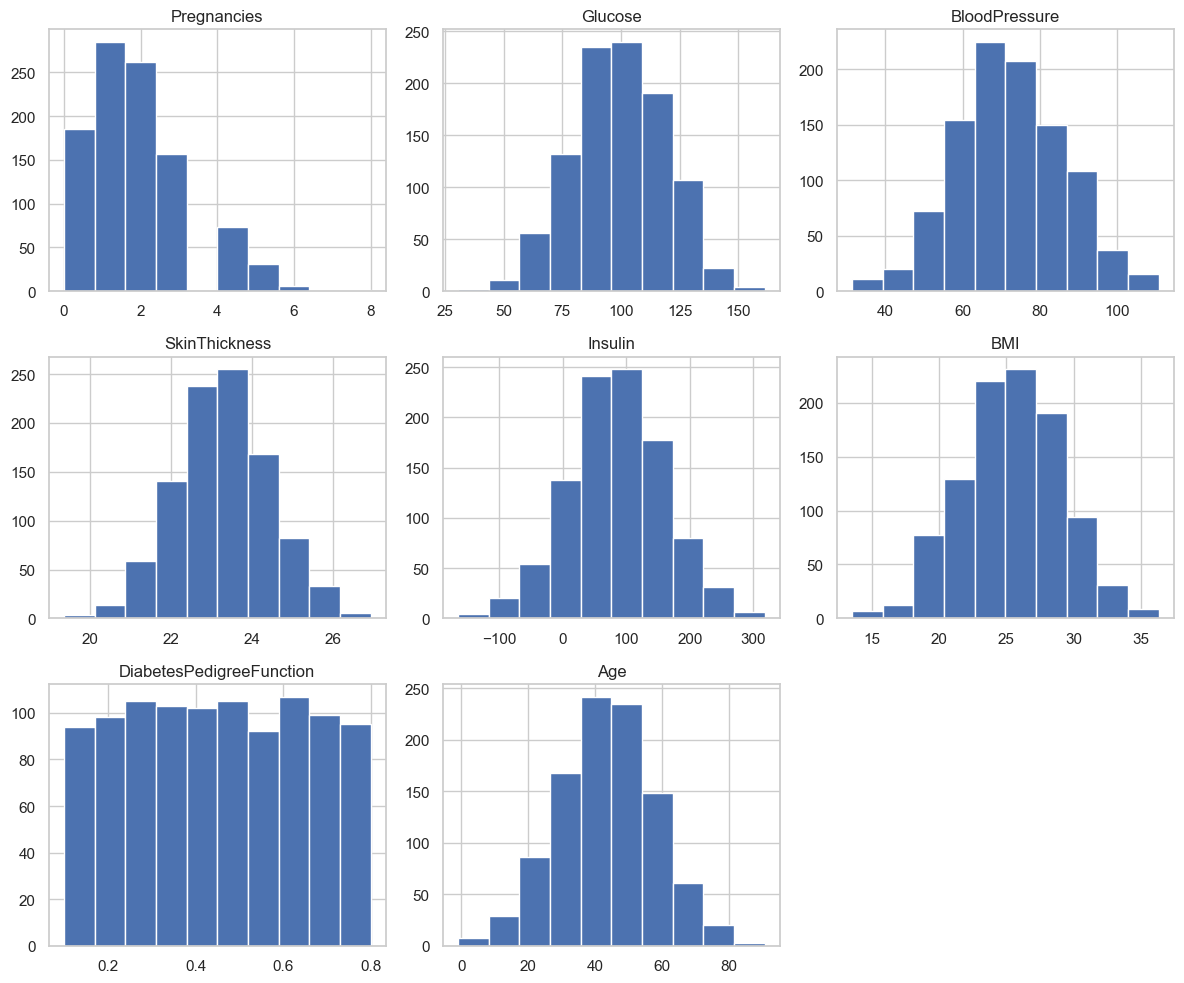

In [19]:
sns.set(style = 'whitegrid')

numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Diabetes_data[numerical_features].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [20]:
Diabetes_data['log_DiabetesPedigreeFunction']=np.log(Diabetes_data['DiabetesPedigreeFunction'])

(array([ 39.,  31.,  48.,  54.,  78., 104., 113., 150., 179., 204.]),
 array([-2.30221537, -2.0943515 , -1.88648762, -1.67862374, -1.47075987,
        -1.26289599, -1.05503211, -0.84716823, -0.63930436, -0.43144048,
        -0.2235766 ]),
 <BarContainer object of 10 artists>)

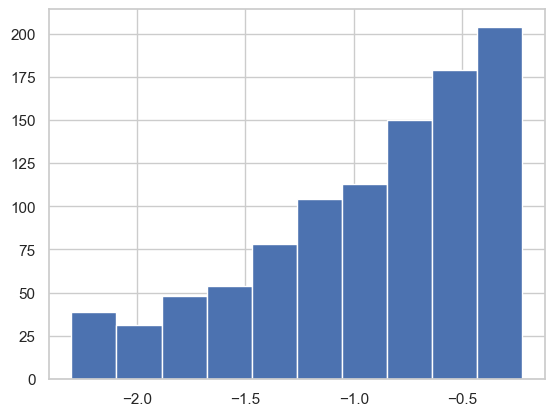

In [21]:
plt.hist(Diabetes_data['log_DiabetesPedigreeFunction'])

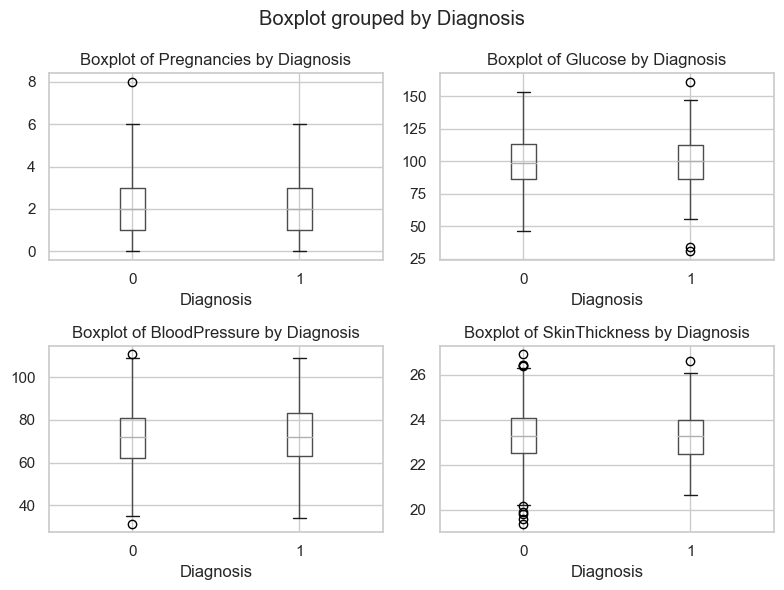

In [34]:
plt.figure(figsize=(8, 6))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness']):
    plt.subplot(2, 2, i + 1)
    Diabetes_data.boxplot(column=col, by='Diagnosis', ax=plt.gca())
    plt.title(f'Boxplot of {col} by Diagnosis')

plt.tight_layout()
plt.show()

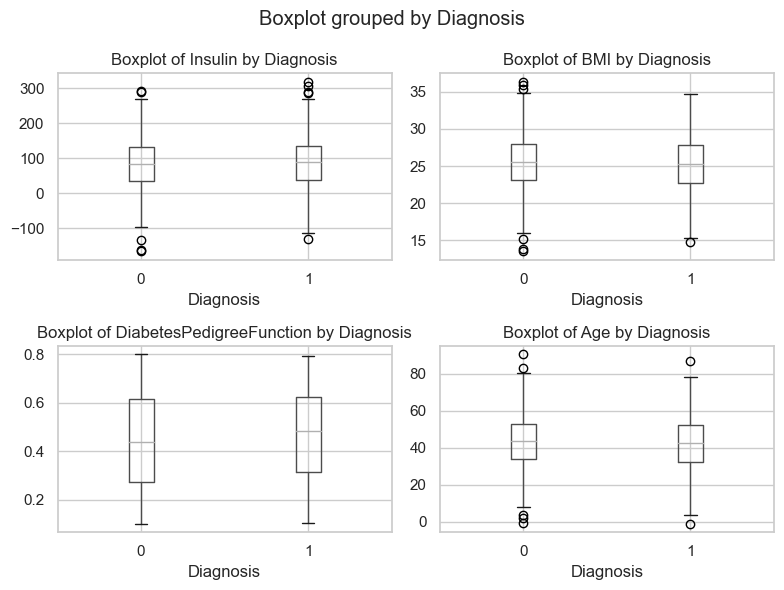

In [35]:
plt.figure(figsize=(8, 6))
for i, col in enumerate(['Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(2, 2, i + 1)
    Diabetes_data.boxplot(column=col, by='Diagnosis', ax=plt.gca())
    plt.title(f'Boxplot of {col} by Diagnosis')

plt.tight_layout()
plt.show()